Import

In [5]:
import pandas as pd
import re

Read CSV

In [6]:
df_bordeaux = pd.read_csv("../dashbord/static/base/CSV/bordeaux/listings_bordeaux.csv")


In [7]:
df_bordeaux.columns


Index(['id', 'description', 'host_id', 'host_name', 'host_response_rate',
       'host_acceptance_rate', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'room_type', 'bathrooms', 'bathrooms_text',
       'amenities', 'price', 'number_of_reviews'],
      dtype='object')

### Question n°1  

In [8]:
question1 = df_bordeaux.groupby("neighbourhood_cleansed").apply(lambda s: pd.Series({ 
    "host count": s["host_id"].nunique(), 
    "sum reviews": s["number_of_reviews"].sum(), 
}))
question1.reset_index()

,neighbourhood_cleansed,host count,sum reviews
0,3M-Bourgailh,8,98
1,Ambars-et-Lagrave,65,904
2,Ambs,49,1714
3,Arago-La Chataigneraie,43,1583
4,Arlac,90,2973
...,...,...,...
57,Sardine,17,788
58,Talence,429,13571
59,Toctoucau,16,479
60,Verthamon,24,799


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


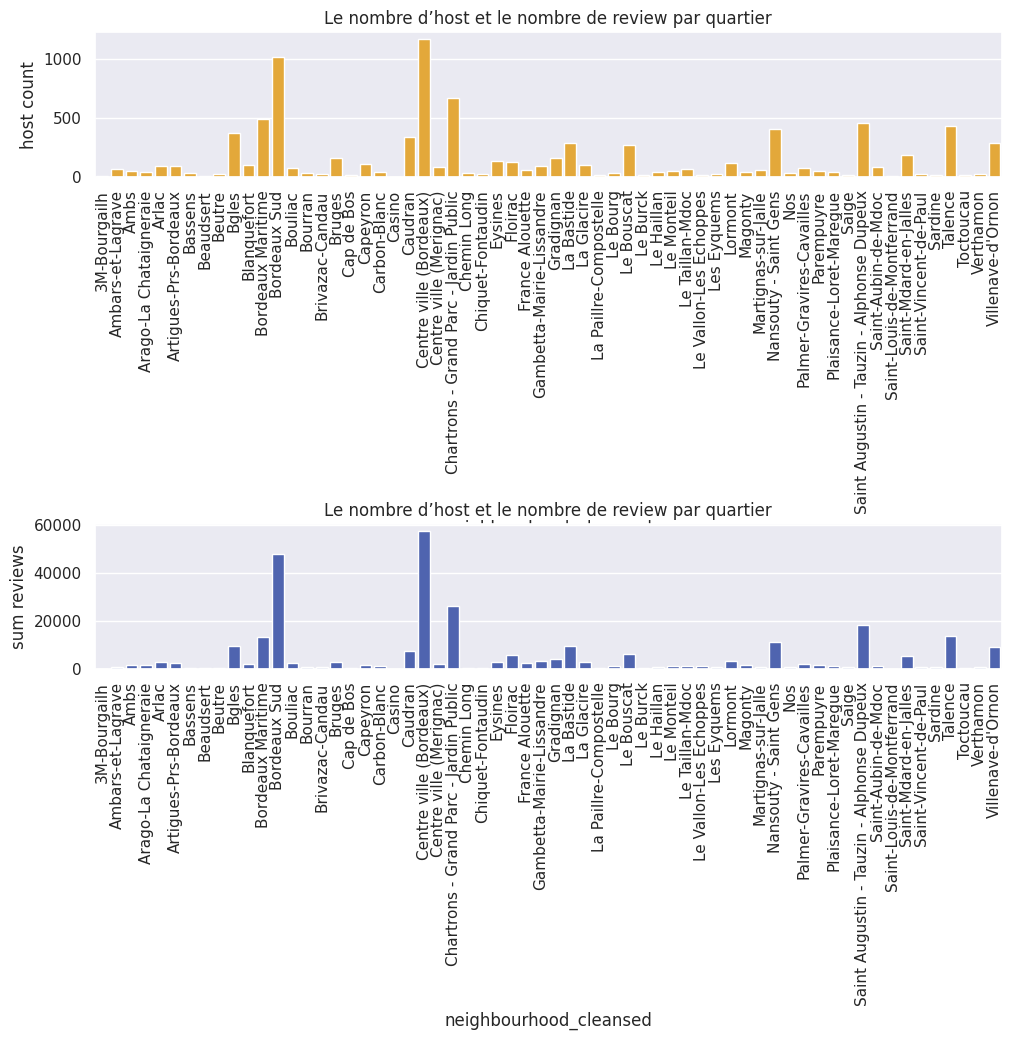

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = plt.figure()
fig.subplots_adjust(hspace=2.4, wspace=0.4)

ax = fig.add_subplot(2, 1, 1)
plt.title("Le nombre d’host et le nombre de review par quartier")
yellow='#FFB11E'
by_neighborhood = sns.barplot(data = question1.reset_index(), x ='neighbourhood_cleansed', y = 'host count' , color=yellow)
for item in by_neighborhood.get_xticklabels():
    item.set_rotation(90)
ax = fig.add_subplot(2, 1, 2)
plt.title("Le nombre d’host et le nombre de review par quartier")
yellow='#3f5bbf'
by_neighborhood = sns.barplot(data = question1.reset_index(), x ='neighbourhood_cleansed', y = 'sum reviews' , color=yellow)
for item in by_neighborhood.get_xticklabels():
    item.set_rotation(90)


### Question n°2

Text(0.5, 1.0, 'host acceptance rate mean ')

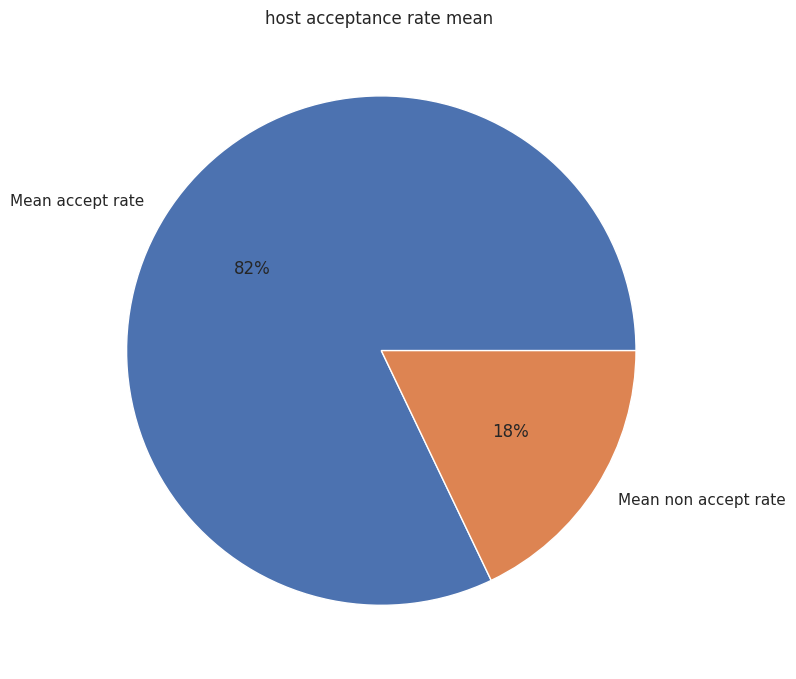

In [11]:
df_host_acceptance_rate=df_bordeaux["host_acceptance_rate"].str.rstrip('%').astype(float)

mean_df_host_acceptance_rate = df_host_acceptance_rate.mean()
data = [mean_df_host_acceptance_rate, 100 - mean_df_host_acceptance_rate]
plt.pie(data, labels = ['Mean accept rate', 'Mean non accept rate'], autopct='%.0f%%')
plt.title("host acceptance rate mean ")

Text(0.5, 1.0, 'Mean response rate mean')

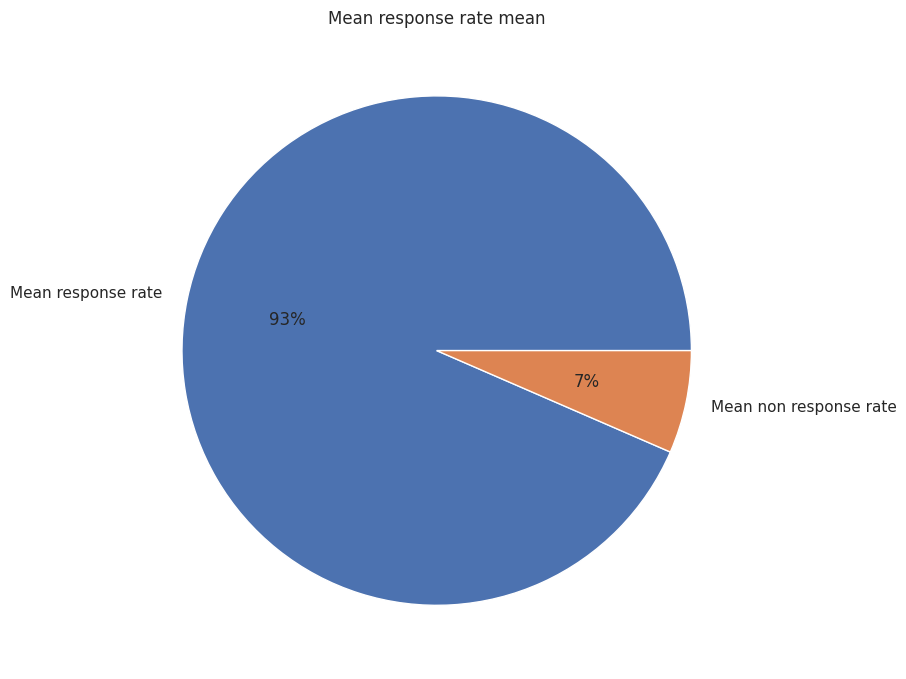

In [12]:
df_host_response_rate=df_bordeaux["host_response_rate"].str.rstrip('%').astype(float)

mean_df_host_response_rate = df_host_response_rate.mean()
data = [mean_df_host_response_rate, 100 - mean_df_host_response_rate]
plt.pie(data, labels = ['Mean response rate', 'Mean non response rate'], autopct='%.0f%%')
plt.title("Mean response rate mean")

### Question n°3

In [13]:
df_bordeaux[['id',"host_verifications"]].groupby("host_verifications").count()/len(df_bordeaux)*100

,id
host_verifications,
"['email', 'phone', 'work_email']",6.219568
"['email', 'phone']",85.319247
"['email', 'work_email']",0.009187
['email'],0.413413
"['phone', 'work_email']",0.220487
['phone'],7.533303
[],0.284796


In [14]:
df_bordeaux.replace(to_replace="work_email", value='work', regex=True,inplace=True)

In [15]:
email = df_bordeaux["host_verifications"].apply(lambda elt: 1 if 'email' in elt else 0 ).sum()
phone = df_bordeaux["host_verifications"].apply(lambda elt: 1 if 'phone' in elt else 0 ).sum()
work = df_bordeaux["host_verifications"].apply(lambda elt: 1 if 'work' in elt else 0 ).sum()
vide = df_bordeaux["host_verifications"].apply(lambda elt: 1 if elt == "[]" else 0 ).sum()
  
print("Il y a {0} personnes qui utilise un email pour la vérification soit {1} %".format(email,email/len(df_bordeaux)*100))
print("Il y a {0} personnes qui utilise un téléphone pour la vérification soit {1} %".format(phone,phone/len(df_bordeaux)*100))
print("Il y a {0} personnes qui utilise un email pro pour la vérification soit {1} %".format(work,work/len(df_bordeaux)*100))
print("Il y a {0} personnes qui n'ont pas  pour la vérification soit {1} %".format(vide,vide/len(df_bordeaux)*100))

Il y a 10010 personnes qui utilise un email pour la vérification soit 91.96141479099678 %
Il y a 10808 personnes qui utilise un téléphone pour la vérification soit 99.29260450160771 %
Il y a 702 personnes qui utilise un email pro pour la vérification soit 6.449242076251722 %
Il y a 31 personnes qui n'ont pas  pour la vérification soit 0.2847955902618282 %


Text(0, 0.5, 'Pourcentages')

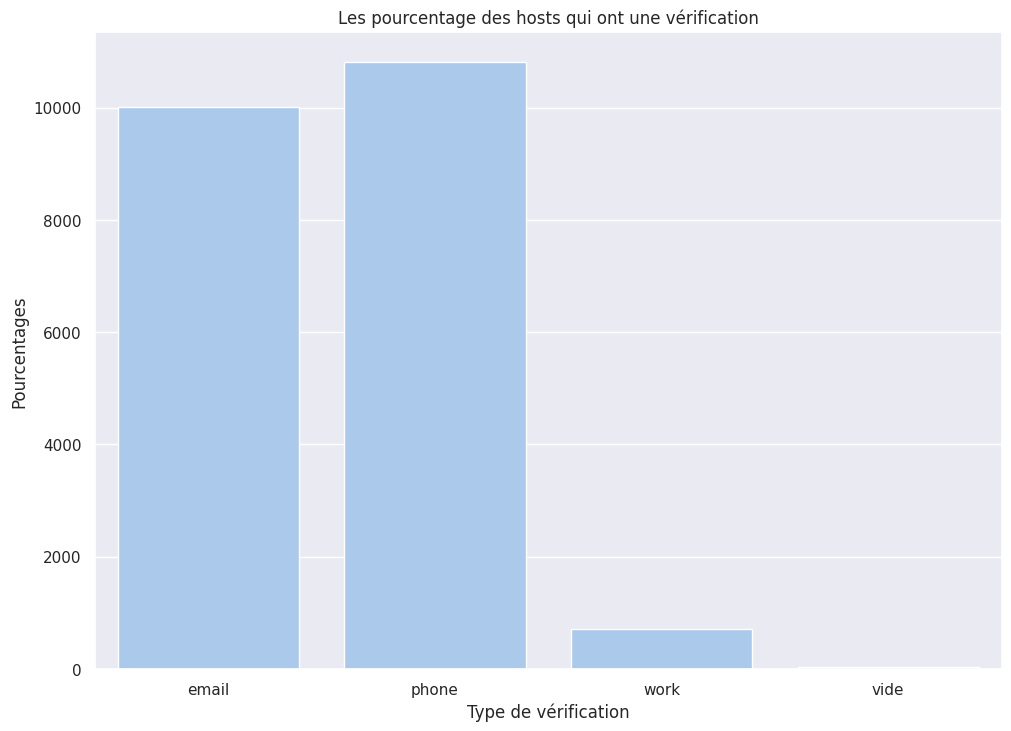

In [16]:
data = [email, phone, work, vide]
labels = ["email", "phone", "work", "vide"]

question3 = pd.DataFrame({"data":data, "labels": labels})

# sns.set_theme(style="whitegrid")
# f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(data = question3, x= labels, y =data
            , color="b")
plt.title("Les pourcentage des hosts qui ont une vérification")
plt.xlabel("Type de vérification")
plt.ylabel("Pourcentages")

### Question n°4

In [17]:
df_bordeaux["np_amenities"] =  df_bordeaux['amenities'].apply(lambda elt: re.sub("\[|\]|\"","",elt))
df_bordeaux["np_amenities"] = df_bordeaux["np_amenities"].apply(lambda elt: elt.split(","))


In [18]:
df_bordeaux["np_amenities"] =  df_bordeaux["np_amenities"].apply(lambda x: len(x))


In [19]:
question_4 = df_bordeaux[["np_amenities","room_type"]].groupby('room_type').agg(["mean","std"])

question_4.columns = question_4.columns.droplevel(level = 0)
question_4.reset_index()

,room_type,mean,std
0,Entire home/apt,27.603407,14.178751
1,Hotel room,26.177778,14.458858
2,Private room,21.365678,12.438094
3,Shared room,15.411765,7.957415


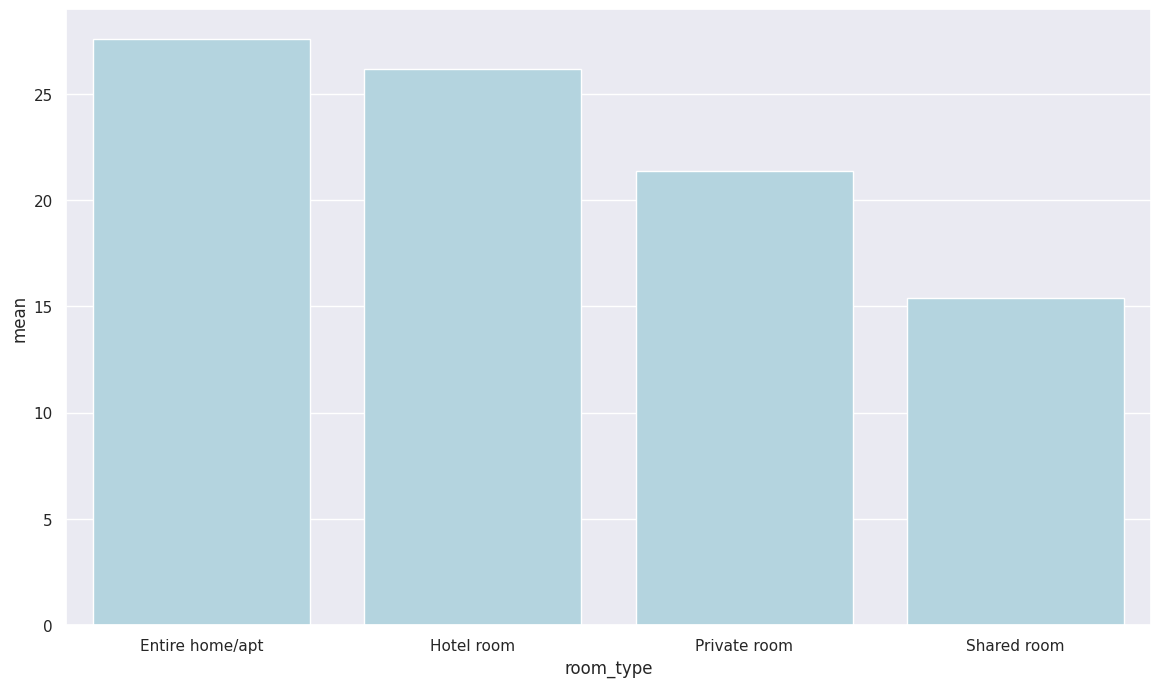

In [20]:
import numpy as np
# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="room_type", y="mean", data=question_4.reset_index(), capsize=.2, color='lightblue',errorbar='sd')

### Question n° 5

In [21]:
df_bordeaux["price"]= df_bordeaux["price"].str.replace(',',"")
df_bordeaux["price"]= df_bordeaux["price"].str.replace('$',"").astype(float)

/tmp/ipykernel_13583/484732451.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_bordeaux["price"]= df_bordeaux["price"].str.replace('$',"").astype(float)


In [22]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)

In [23]:
question_5 = df_bordeaux[["price","room_type"]].groupby('room_type').agg(["median","max","min",q1,q3])
question_5.columns = question_5.columns.droplevel()
question_5

,median,max,min,q1,q3
room_type,,,,,
Entire home/apt,84.0,8890.0,12.0,60.00,130.00
Hotel room,131.0,391.0,0.0,100.00,169.00
Private room,40.0,1492.0,10.0,30.00,60.00
Shared room,42.5,275.0,9.0,25.75,49.25


Text(0.5, 1.0, 'Boxplot by room type without exreme values')

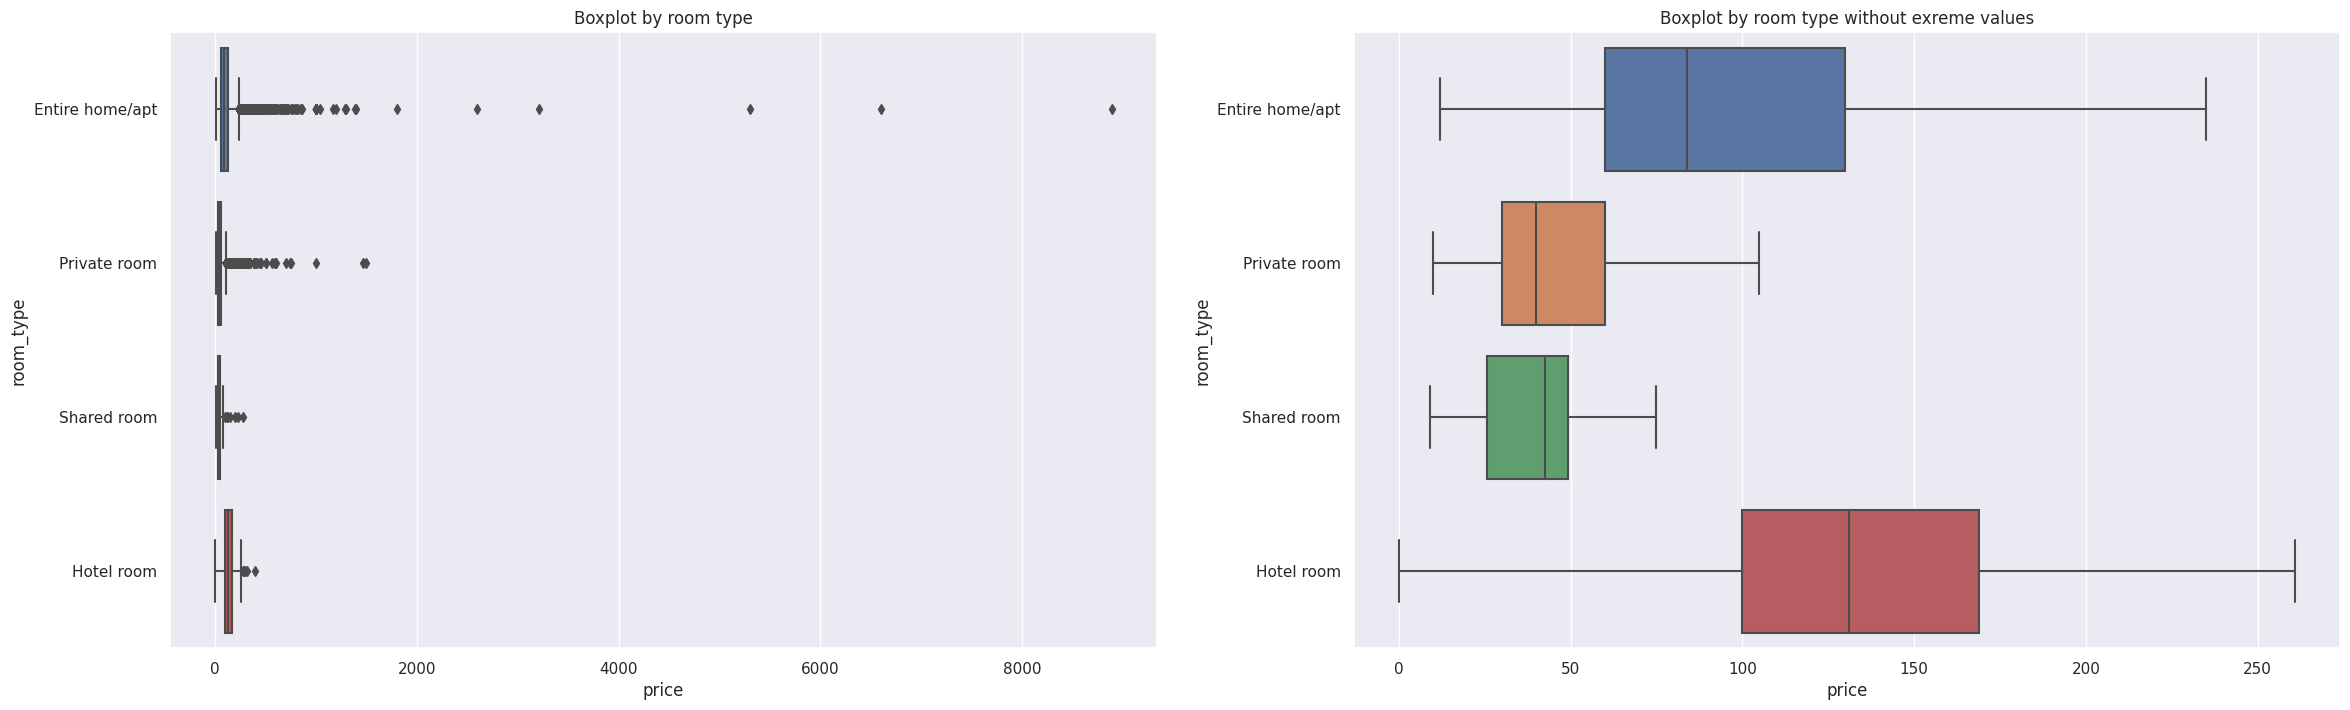

In [24]:
plt.figure(figsize=(28,8))
plt.subplot(1, 2, 1)
sns.boxplot(data = df_bordeaux,x = "price" ,y= "room_type")
plt.title("Boxplot by room type")

plt.subplot(1, 2, 2)
sns.boxplot(data = df_bordeaux,x = "price" ,y= "room_type", showfliers = False)
plt.title("Boxplot by room type without exreme values")

### Question n°6

In [25]:
df_bordeaux["bathrooms_text"].unique()

array(['1.5 baths', '3 baths', '1 bath', '1 private bath', nan, '2 baths',
       '1 shared bath', 'Shared half-bath', '4 baths', '8 baths',
       '5 baths', '4.5 baths', '2.5 baths', '0 baths', '1.5 shared baths',
       '3.5 baths', 'Half-bath', '3 shared baths', '6 baths', '5.5 baths',
       '7 baths', '0 shared baths', '2.5 shared baths',
       'Private half-bath', '2 shared baths', '6.5 baths',
       '4 shared baths', '11.5 baths', '7.5 baths'], dtype=object)

In [26]:
def first(s):
    return(re.findall("\d+\.\d+|\d+", s))

def last(s):
    return(re.split('(\d+)', s)[-1])

In [27]:
df_bordeaux['number_bath'] = df_bordeaux['bathrooms_text'].apply(lambda x :  first(str(x)))
df_bordeaux['bath_describe'] = df_bordeaux['bathrooms_text'].apply(lambda x : last(str(x)))
df_bordeaux['number_bath'] = pd.DataFrame([x for x in df_bordeaux['number_bath'] ]) # remove list from N

In [28]:
mask = df_bordeaux["bath_describe"] == "nan"
df_bordeaux[mask]
df_bordeaux_clean = df_bordeaux.drop(df_bordeaux[mask].index)

In [29]:
df_bordeaux_clean['number_bath'].unique()

array(['1.5', '3', '1', '2', None, '4', '8', '5', '4.5', '2.5', '0',
       '3.5', '6', '5.5', '7', '6.5', '11.5', '7.5'], dtype=object)

In [30]:
df_bordeaux_clean["bath_describe"].unique()

array([' baths', ' bath', ' private bath', ' shared bath',
       'Shared half-bath', ' shared baths', 'Half-bath',
       'Private half-bath'], dtype=object)

In [31]:
df_bordeaux_clean['number_bath'] =df_bordeaux_clean['number_bath'].apply(lambda x: 1 if (x is None) else float(x))

In [32]:
df_bordeaux_clean["bath_describe"]=df_bordeaux_clean["bath_describe"].str.lower()

In [33]:
df_bordeaux_clean["bath_describe"].unique()

array([' baths', ' bath', ' private bath', ' shared bath',
       'shared half-bath', ' shared baths', 'half-bath',
       'private half-bath'], dtype=object)

In [34]:

df_bordeaux_clean['private'] = df_bordeaux_clean['bath_describe'].apply(lambda x: 2 if ("private" in x) else 1)
df_bordeaux_clean['shared'] = df_bordeaux_clean['bath_describe'].apply(lambda x: 0.5 if ("shared" in x) else 1)
df_bordeaux_clean['half_bath'] = df_bordeaux_clean['bath_describe'].apply(lambda x: 0.5 if ("half-bath" in x) else 1)



In [35]:
df_bordeaux_clean['number_bath'] = df_bordeaux_clean['number_bath'] * df_bordeaux_clean['half_bath'] * df_bordeaux_clean['private']*df_bordeaux_clean['shared']

In [36]:
df_bordeaux_clean["number_bath"].unique()

array([ 1.5 ,  3.  ,  1.  ,  2.  ,  0.5 ,  0.25,  4.  ,  8.  ,  5.  ,
        4.5 ,  2.5 ,  0.  ,  0.75,  3.5 ,  6.  ,  5.5 ,  7.  ,  1.25,
        6.5 , 11.5 ,  7.5 ])

In [37]:
question6 = df_bordeaux_clean[["host_id","number_bath"]].groupby("number_bath").count()
question6.reset_index()

,number_bath,host_id
0,0.00,48
1,0.25,16
2,0.50,1152
3,0.75,74
4,1.00,6449
5,1.25,14
6,1.50,479
7,2.00,2125
8,2.50,154
9,3.00,237


<AxesSubplot:xlabel='number_bath', ylabel='Count'>

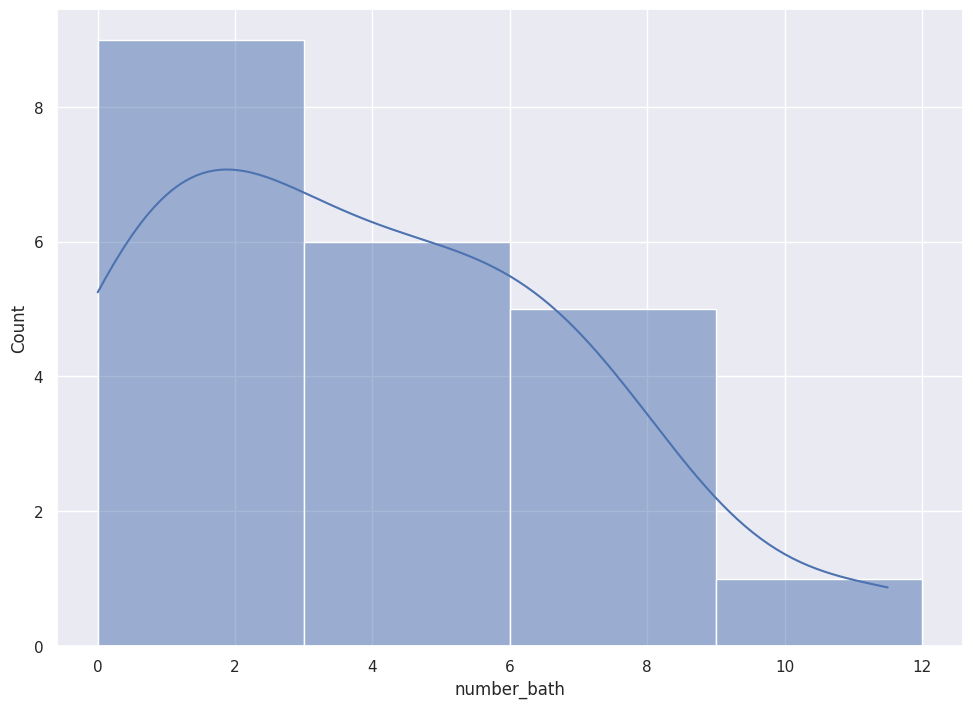

In [38]:
sns.histplot(data = question6, x = 'number_bath',  kde=True, binwidth=3)

### Question n°7

In [39]:
df_bordeaux_simple = df_bordeaux[["number_of_reviews",'description']]

In [40]:
df_bordeaux_simple["len_description"] = df_bordeaux_simple['description'].apply(lambda x: len(str(x)))

/tmp/ipykernel_13583/1551447806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bordeaux_simple["len_description"] = df_bordeaux_simple['description'].apply(lambda x: len(str(x)))


In [41]:
df_bordeaux_simple["len_description"]

0        1000
1         912
2        1000
3        1000
4        1000
         ... 
10880    1000
10881    1000
10882     809
10883    1000
10884    1000
Name: len_description, Length: 10885, dtype: int64

In [42]:
df_bordeaux_simple["number_of_reviews"].corr(df_bordeaux_simple['len_description'])



0.18874514227447148

Text(0.5, 1.0, 'heatmap of the correlation between number_of_reviews and len_description')

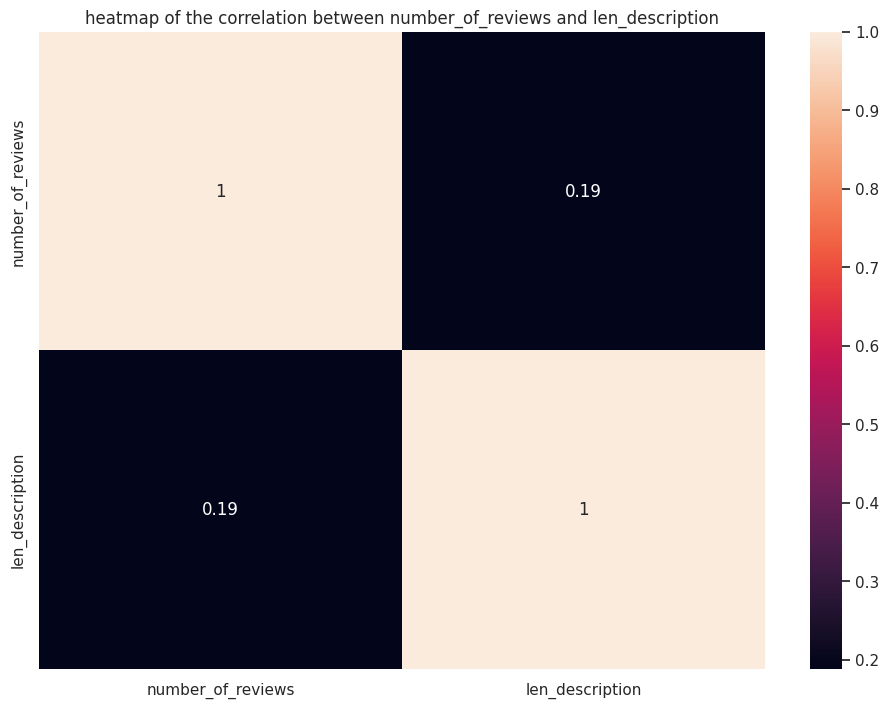

In [43]:
df_corr = df_bordeaux_simple[["number_of_reviews", "len_description"]]
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("heatmap of the correlation between number_of_reviews and len_description")

### question n°8

Text(0.5, 1.0, 'seaborn scatterplot')

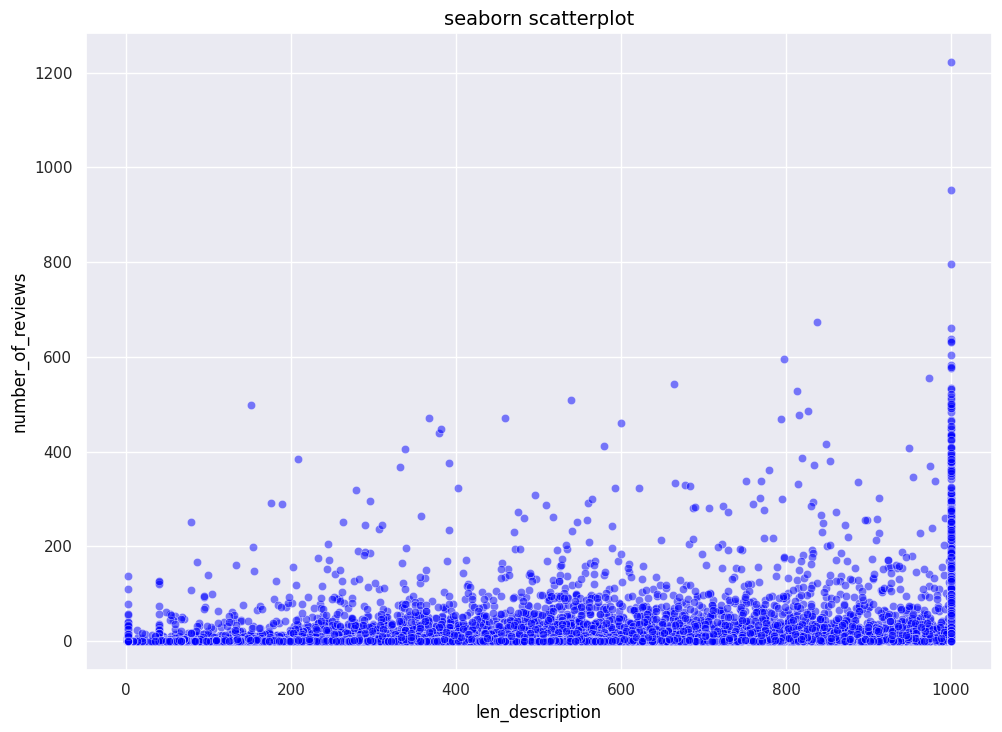

In [44]:
sns.scatterplot(y='number_of_reviews', x='len_description', data = df_bordeaux_simple,
                 alpha= 0.5, color = 'blue')
plt.xlabel('len_description', fontsize = 12, color = 'black')
plt.ylabel('number_of_reviews', fontsize = 12, color = 'black')
plt.title('seaborn scatterplot', fontsize = 14, color = 'black')

In [45]:
import folium

In [46]:
df_locations = df_bordeaux[["latitude", "longitude", "host_name"]]
map = folium.Map(location=[df_locations.latitude.mean(), df_locations.longitude.mean()], zoom_start=14, control_scale=True)


In [51]:
for index, location_info in df_locations.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["host_name"]).add_to(map)

map.save("index.html")

In [ ]:
df_reviews_bordeaux = pd.read_csv("CSV/bordeaux/reviews_bordeaux.csv")

: 

In [ ]:
df_reviews_bordeaux.columns

: 

In [ ]:
df_reviews_bordeaux.columns=['listing_id', 'id_review', 'date', 'reviewer_id',
       'reviewer_name']

: 

In [ ]:
df_reviews_bordeaux= df_reviews_bordeaux[['listing_id', 'id_review', 'date', 'reviewer_id',
       'reviewer_name']]

: 

In [ ]:
df_reviews_bordeaux.columns

: 

In [ ]:
df_bordeaux.columns

: 

In [ ]:
df_merge = df_reviews_bordeaux.merge(df_bordeaux, how='left',left_on='listing_id',right_on='id') 

: 

In [ ]:
df_merge[["host_id","host_name","reviewer_id","reviewer_name"]]

: 

In [ ]:
mask = df_merge["host_name"] ==df_merge["reviewer_name"]


: 

In [ ]:
df_merge[["host_name","reviewer_name"]][mask]

: 

In [ ]:
len(df_merge[["host_name","reviewer_name"]][mask])/len(df_merge)*100

: 

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df_bordeaux,lat='latitude',lon='longitude',center=dict(lat=df_bordeaux.latitude.mean(), lon=df_bordeaux.longitude.mean()), zoom=7.5,
                        mapbox_style="carto-darkmatter")
                
                        
fig.update_layout(title = '', title_x=0.5)
fig.show()

: 

In [ ]:
dico={}
liste= []
for city in ["paris","bordeaux","pays_basque",'lyon',"amsterdam","antwerp","bristol","brussels","ghent","edinburgh","greater_manchester","london","rotterdam","the_hague"]:
    data = pd.read_csv(f"CSV/{city}/listings_{city}.csv")
    liste.append(data)
df_total = pd.concat(liste)

: 

In [ ]:
df_total

: 